In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

 - https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
 - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html
 - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html

In [2]:
def lokta_volterra(t, x, a, b, c, d):
    return np.array([
        a*x[0] - b*x[0]*x[1],
        d*x[0]*x[1] - c*x[1]
    ])

In [3]:
tlin = np.linspace(0, 100, 10000)

In [4]:
p = [2/3, 4/3, 1, 1]

In [5]:
solution = integrate.solve_ivp(lokta_volterra, [0, 100], y0=[0.9, 1.8], args=p, t_eval=tlin)

In [6]:
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 872
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00010001e-02, 2.00020002e-02, ...,
       9.99799980e+01, 9.99899990e+01, 1.00000000e+02])
 t_events: None
        y: array([[0.9       , 0.88454407, 0.86937764, ..., 2.09408736, 2.10589265,
        2.11774003],
       [1.8       , 1.79806129, 1.79584966, ..., 0.07798223, 0.07884495,
        0.07972657]])
 y_events: None

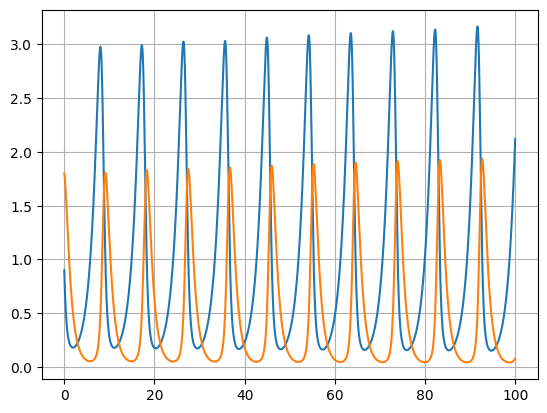

In [7]:
fig, axe = plt.subplots()
axe.plot(solution.t, solution.y.T)
axe.grid()

In [16]:
xlin = np.linspace(0, 4, 200)
ylin = np.linspace(0, 3, 200)
X, Y = np.meshgrid(xlin, ylin)

In [25]:
xlinq = np.linspace(0, 4, 20)
ylinq = np.linspace(0, 3, 20)
Xq, Yq = np.meshgrid(xlinq, ylinq)

In [26]:
U, V = lokta_volterra(None, (X, Y), *p)
Z = np.sqrt(U**2 + V**2)

In [27]:
Uq, Vq = lokta_volterra(None, (Xq, Yq), *p)
Zq = np.sqrt(Uq**2 + Vq**2)

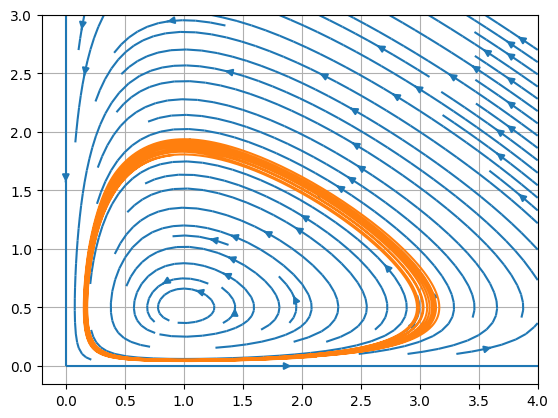

In [28]:
fig, axe = plt.subplots()
axe.streamplot(X, Y, U, V)
axe.plot(solution.y[0,:], solution.y[1,:])
#axe.contour(X, Y, Z, 20)
axe.grid()

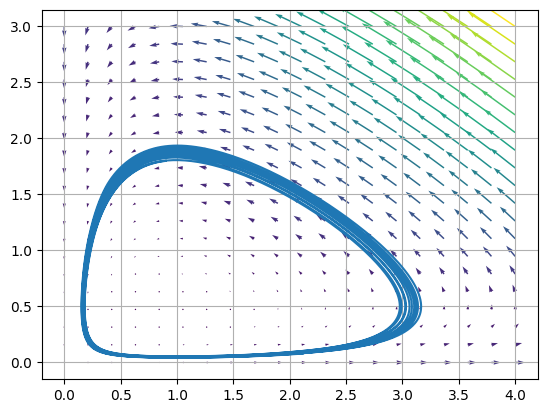

In [89]:
fig, axe = plt.subplots()
#axe.contour(X, Y, Z, 20)
axe.quiver(Xq, Yq, Uq, Vq, Zq)
axe.plot(solution.y[0,:], solution.y[1,:])
axe.grid()